In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier as dtree
from mpl_toolkits import mplot3d
from sklearn.ensemble import IsolationForest
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report
import scikitplot as skplt
from sklearn import tree
from sklearn.cluster import DBSCAN

In [2]:
url_1 = r'C:\Users\sirio.papa_intarget\Downloads\winequality-red.csv'
url_2 = r'C:\Users\sirio.papa_intarget\Downloads\winequality-white.csv'

df_1 = pd.read_csv(url_1, delimiter=';')
df_2 = pd.read_csv(url_2, delimiter=';')

df = pd.concat([df_1, df_2], ignore_index=True)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   object 
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 660.0+ KB


In [5]:
df[df['alcohol'].str.len()>5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
1441,7.4,0.785,0.19,5.2,0.094,19.0,98.0,0.99713,3.16,0.52,956.666.666.666.667,6,0


In [6]:
df['alcohol'][1441]=9.5
df['alcohol'] = df['alcohol'].astype('float')

C:\Users\sirio.papa_intarget\AppData\Local\Temp\ipykernel_3340\172345455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['alcohol'][1441]=9.5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


## Outlier Detection

#### Scaling the data

In [8]:
scaler = preprocessing.StandardScaler()

X = scaler.fit_transform(df.drop(columns='color').values)

#### Isolation Forest Algorithm

In [9]:
clf = IsolationForest(n_estimators=1000, 
                      n_jobs=2, 
                      bootstrap= True, 
                      verbose=1, 
                      random_state=36)
predictions = clf.fit_predict(X)


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    3.6s finished


In [10]:
df['outliers'] = predictions

outliers = df[df['outliers']==-1]
no_outliers = df[df['outliers']!=-1]

print("Number of outliers: {}".format(len(outliers)))

Number of outliers: 427


#### Scale the data to three dimension to visualize better

In [11]:
z_ = scaler.fit_transform(no_outliers['pH'].values.reshape(-1,1))
y_ = scaler.fit_transform(no_outliers['total sulfur dioxide'].values.reshape(-1,1))
x_ = scaler.fit_transform(no_outliers['chlorides'].values.reshape(-1,1))

z_o = scaler.fit_transform(outliers['pH'].values.reshape(-1,1))
y_o = scaler.fit_transform(outliers['total sulfur dioxide'].values.reshape(-1,1))
x_o = scaler.fit_transform(outliers['chlorides'].values.reshape(-1,1))

#### Visualize Outliers in 3D

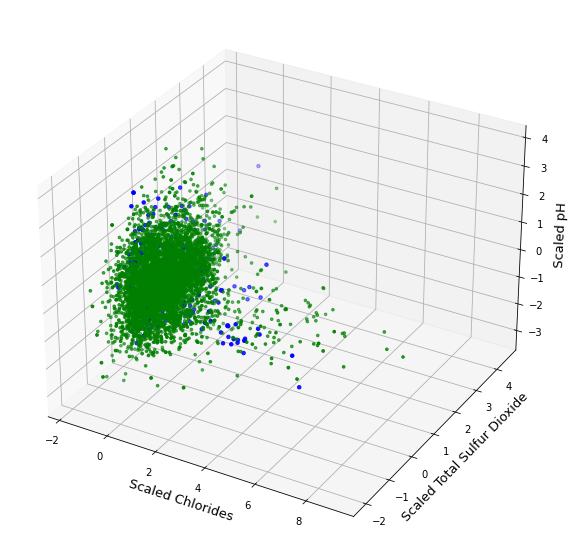

In [12]:
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")

ax.scatter3D(x_o, y_o, z_o, color = "blue", s = 12)
ax.scatter3D(x_, y_, z_, color = "green", s = 7)

ax.set_xlabel('Scaled Chlorides', fontsize=13)
ax.set_ylabel('Scaled Total Sulfur Dioxide', fontsize=13)
ax.set_zlabel('Scaled pH', fontsize=13)
 
# show plot
plt.show()

#### Remove outliers and clean the df

In [13]:
df = df[df['outliers']==1]
df.drop(columns='outliers', inplace=True)
df.reset_index(inplace=True, drop=True)

In [14]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6065,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6066,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6067,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6068,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


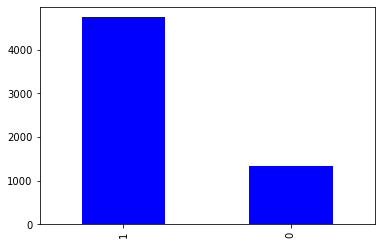

In [15]:
df['color'].value_counts().plot(kind='bar', color='blue')
plt.show()

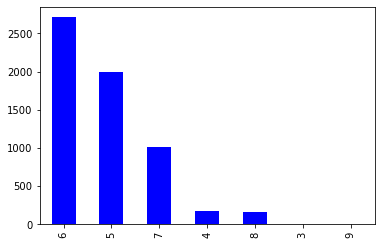

In [16]:
df['quality'].value_counts().plot(kind='bar', color='blue')
plt.show()

In [17]:
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
fixed acidity,1.000000,0.229286,0.232655,-0.132383,0.315810,-0.266612,-0.307028,0.021675,-0.217637,0.247423,-0.087573,-0.079870,-0.469541
volatile acidity,0.229286,1.000000,-0.416287,-0.199293,0.442337,-0.350050,-0.407663,-0.007237,0.243457,0.199608,-0.074401,-0.254508,-0.660839
citric acid,0.232655,-0.416287,1.000000,0.131488,-0.101840,0.161290,0.230309,-0.005114,-0.275406,0.000510,0.026567,0.093189,0.249414
residual sugar,-0.132383,-0.199293,0.131488,1.000000,-0.146695,0.424430,0.492411,0.088028,-0.273389,-0.192540,-0.367299,-0.033244,0.344320
chlorides,0.315810,0.442337,-0.101840,-0.146695,1.000000,-0.224947,-0.308052,0.011621,0.145931,0.284428,-0.316768,-0.232065,-0.600763
free sulfur dioxide,-0.266612,-0.350050,0.161290,0.424430,-0.224947,1.000000,0.713609,0.012054,-0.157972,-0.168529,-0.174636,0.081724,0.460365
total sulfur dioxide,-0.307028,-0.407663,0.230309,0.492411,-0.308052,0.713609,1.000000,0.013950,-0.240011,-0.258838,-0.265738,-0.036955,0.688049
density,0.021675,-0.007237,-0.005114,0.088028,0.011621,0.012054,0.013950,1.000000,0.000703,-0.015826,-0.053873,-0.039796,0.001058
pH,-0.217637,0.243457,-0.275406,-0.273389,0.145931,-0.157972,-0.240011,0.000703,1.000000,0.260815,0.079830,0.015813,-0.348559
sulphates,0.247423,0.199608,0.000510,-0.192540,0.284428,-0.168529,-0.258838,-0.015826,0.260815,1.000000,-0.005227,0.033216,-0.463640


## Classification Analysis

In [18]:
train, test = train_test_split(df, test_size=0.2)

x_train = train.loc[:, train.columns != 'color'].values
y_train = train['color'].values

## Extract the features
features = train.drop(columns='color').columns

In [19]:
clf = dtree(max_depth = 3, min_samples_split = 500, min_samples_leaf = 200, random_state = 42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=200, min_samples_split=500,
                       random_state=42)

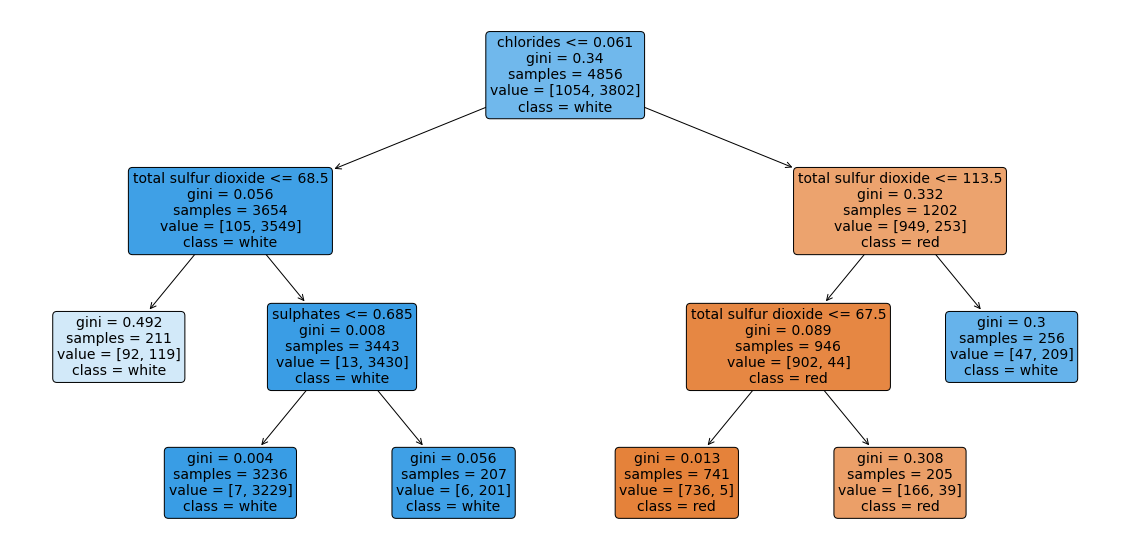

In [20]:
plt.figure(figsize=(20,10))

a = tree.plot_tree(clf,
                   feature_names = features,
                   class_names = ['red', 'white'],
                   rounded = True,
                   filled = True,
                   fontsize=14)
plt.show()

In [21]:
x_test = test.loc[:, test.columns != 'color']
y_test = test['color']

y_pred = clf.predict(x_test)

C:\Users\sirio.papa_intarget\anaconda3\envs\classification\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [22]:
target_names = ['red', 'white']

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         red       0.95      0.84      0.89       278
       white       0.95      0.99      0.97       936

    accuracy                           0.95      1214
   macro avg       0.95      0.91      0.93      1214
weighted avg       0.95      0.95      0.95      1214



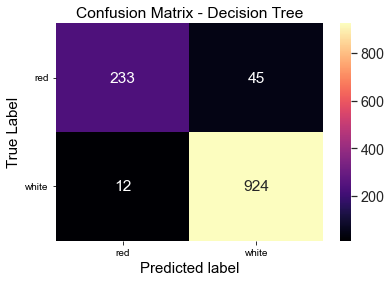

<Figure size 720x504 with 0 Axes>

In [23]:
confusion_matrix = metrics.confusion_matrix(y_test,  y_pred)

matrix_df = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(target_names)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(target_names, rotation = 0)
plt.show()

#### ROC AUC Curve

In [24]:
## Compute the predicted probability of the instances
y_proba = clf.predict_proba(x_test)

C:\Users\sirio.papa_intarget\anaconda3\envs\classification\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


C:\Users\sirio.papa_intarget\anaconda3\envs\classification\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


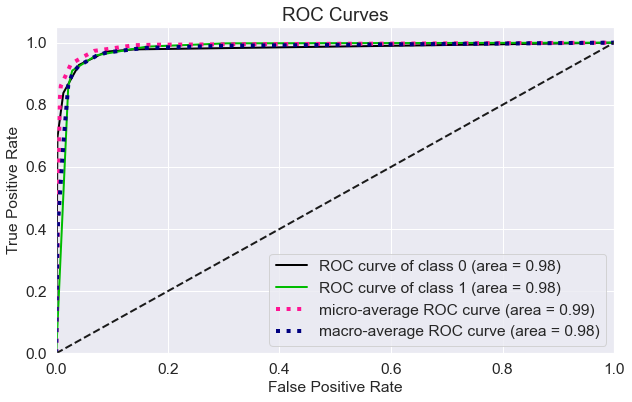

In [25]:
import scikitplot as skplt

skplt.metrics.plot_roc_curve(y_test, y_proba, figsize=(10, 6))
plt.show()

#### SMOTE Algorithm

##### Oversampling training set with SMOTE algorithm

In [26]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x_train_over, y_train_over = oversample.fit_resample(x_train, y_train)

In [27]:
clf.fit(x_train_over, y_train_over)
y_pred_over = clf.predict(x_test)

target_names = ['red', 'white']
print(classification_report(y_test, y_pred_over, target_names=target_names))

              precision    recall  f1-score   support

         red       0.89      0.94      0.91       278
       white       0.98      0.96      0.97       936

    accuracy                           0.96      1214
   macro avg       0.94      0.95      0.94      1214
weighted avg       0.96      0.96      0.96      1214



C:\Users\sirio.papa_intarget\anaconda3\envs\classification\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


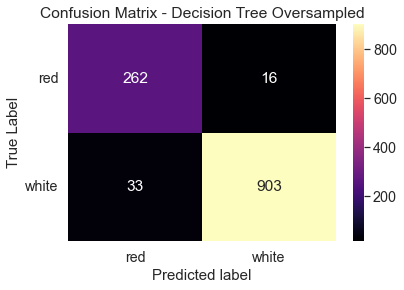

<Figure size 720x504 with 0 Axes>

In [28]:
confusion_matrix = metrics.confusion_matrix(y_test,  y_pred_over)

matrix_df = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

ax.set_title('Confusion Matrix - Decision Tree Oversampled')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(target_names)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(target_names, rotation = 0)
plt.show()

## Clustering Analysis

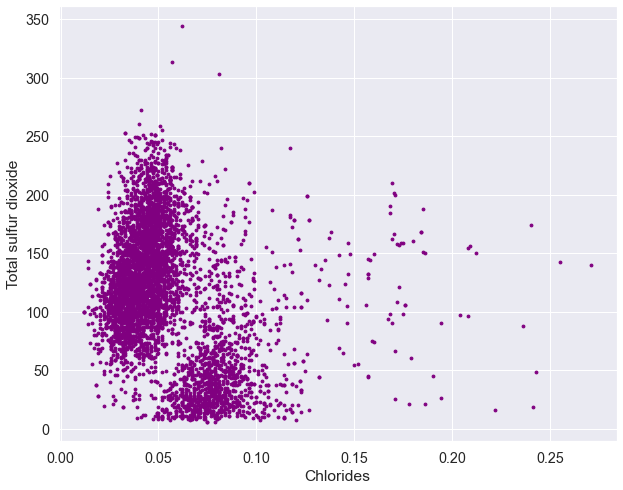

In [29]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(df['chlorides'], df['total sulfur dioxide'], color='purple', s=8)
ax.set_ylabel("Total sulfur dioxide")
ax.set_xlabel("Chlorides")
plt.show()

In [30]:
## scaling data
X = scaler.fit_transform(df.loc[:, df.columns != 'color'].values)

clustering = DBSCAN(eps=1.8, min_samples=30).fit(X)

df['cluster label'] = clustering.labels_

In [31]:
## popolazione dentro ogni cluster
## il cluster -1 rappresenta quello degli outliers
df['cluster label'].value_counts()

 0    5117
-1     953
Name: cluster label, dtype: int64

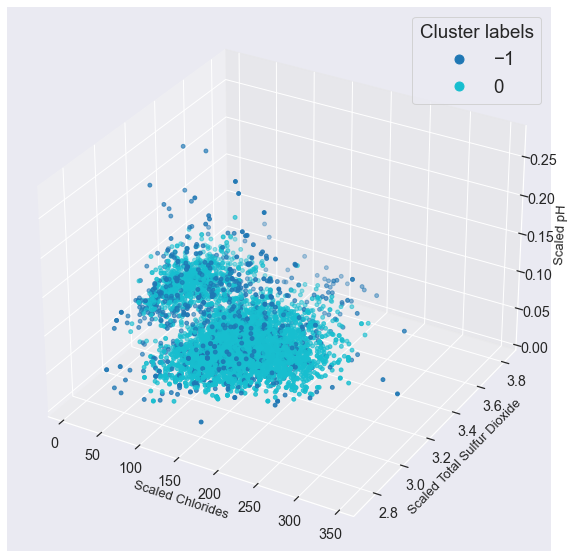

In [32]:
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")

plot = ax.scatter3D(df['total sulfur dioxide'], df['pH'], df['chlorides'], c=df['cluster label'], cmap='tab10', s = 15)
ax.legend(*plot.legend_elements(), fontsize='large', title='Cluster labels', title_fontsize='large', markerscale=1.5)

ax.set_xlabel('Scaled Chlorides', fontsize=13)
ax.set_ylabel('Scaled Total Sulfur Dioxide', fontsize=13)
ax.set_zlabel('Scaled pH', fontsize=13)
 
# show plot
plt.show()

In [33]:
df.drop(columns=['cluster label'], inplace = True)

#### DBSCAN sembra non funzionare bene, quindi proviamo un algoritmo un po' più sofisticato: Gaussian Mixture Model
##### Sembra abbastanza chiaro che i clusters siano due, piuttosto evidenti nella distribuzione nello spazio, tuttavia controlliamo se è possibile individuare un altro cluster di outliers

In [34]:
from sklearn.mixture import GaussianMixture as GM

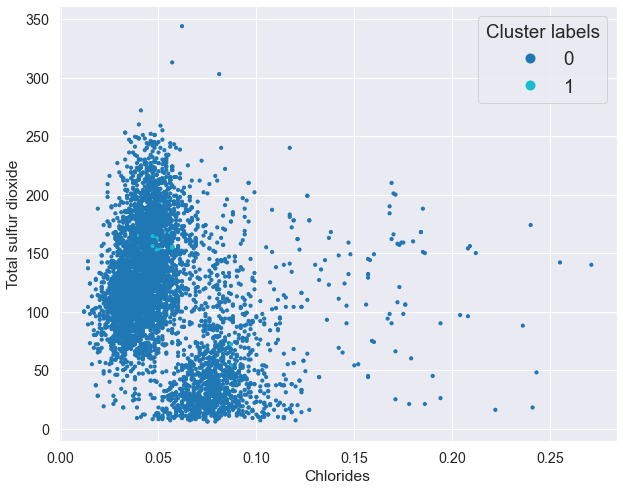

In [35]:
clf = GM(n_components=2, covariance_type='full', random_state=0) #full: each component has its own general covariance matrix
labels =  clf.fit_predict( X )
df['labels'] = labels

fig, ax = plt.subplots(figsize=(10,8))
plot = ax.scatter(df['chlorides'], df['total sulfur dioxide'], c=df['labels'], cmap='tab10', s = 10)
ax.legend(*plot.legend_elements(), fontsize='large', title='Cluster labels', title_fontsize='large', markerscale=1.5)
ax.set_ylabel("Total sulfur dioxide")
ax.set_xlabel("Chlorides")
plt.show()

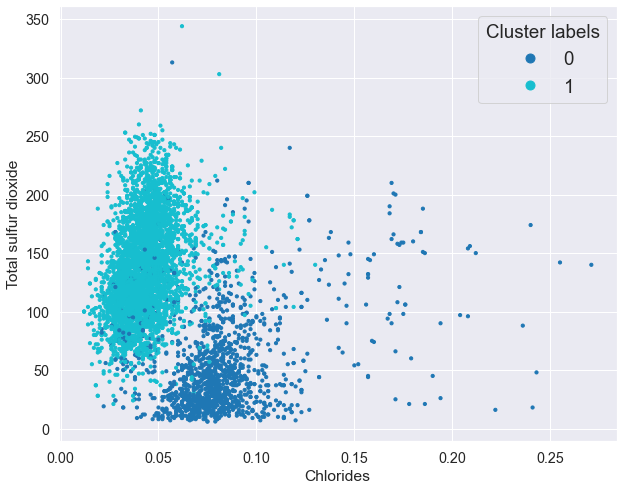

In [36]:
clf = GM(n_components=2, covariance_type='spherical', random_state=0) #spherical: each component has its own single variancex
labels =  clf.fit_predict( X )
df['labels'] = labels

fig, ax = plt.subplots(figsize=(10,8))
plot = ax.scatter(df['chlorides'], df['total sulfur dioxide'], c=df['labels'], cmap='tab10', s = 10)
ax.legend(*plot.legend_elements(), fontsize='large', title='Cluster labels', title_fontsize='large', markerscale=1.5)
ax.set_ylabel("Total sulfur dioxide")
ax.set_xlabel("Chlorides")
plt.show()

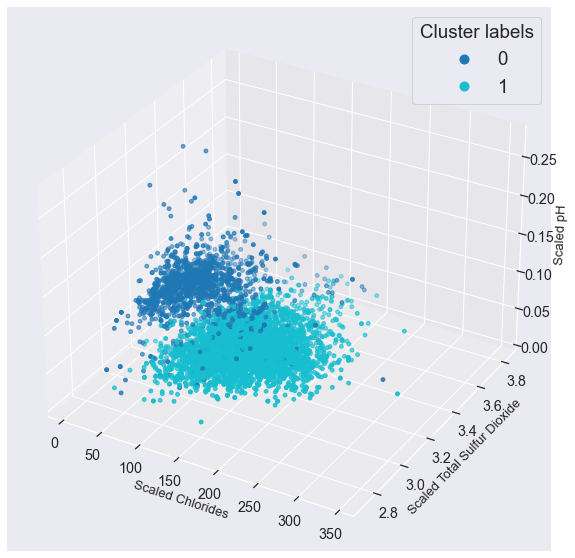

In [37]:
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")

plot = ax.scatter3D(df['total sulfur dioxide'], df['pH'], df['chlorides'], c=df['labels'], cmap='tab10', s = 15)
ax.legend(*plot.legend_elements(), fontsize='large', title='Cluster labels', title_fontsize='large', markerscale=1.5)

ax.set_xlabel('Scaled Chlorides', fontsize=13)
ax.set_ylabel('Scaled Total Sulfur Dioxide', fontsize=13)
ax.set_zlabel('Scaled pH', fontsize=13)
 
# show plot
plt.show()

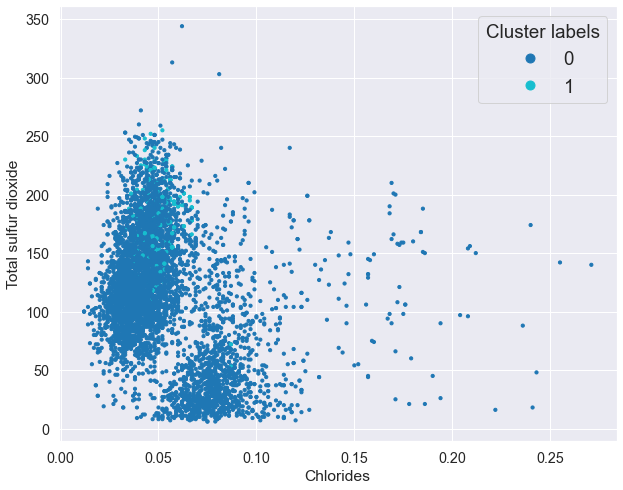

In [38]:
clf = GM(n_components=2, covariance_type='diag', random_state=0) #diag: each component has its own diagonal covariance matrix
labels =  clf.fit_predict( X )
df['labels'] = labels

fig, ax = plt.subplots(figsize=(10,8))
plot = ax.scatter(df['chlorides'], df['total sulfur dioxide'], c=df['labels'], cmap='tab10', s = 10)
ax.legend(*plot.legend_elements(), fontsize='large', title='Cluster labels', title_fontsize='large', markerscale=1.5)
ax.set_ylabel("Total sulfur dioxide")
ax.set_xlabel("Chlorides")
plt.show()

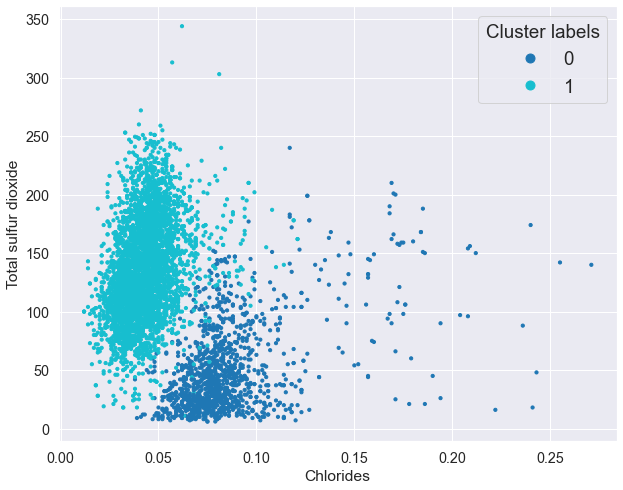

In [39]:
## facciamo dei tentativi di cambiare il modo di calcolo della matrice di covarianza
clf = GM(n_components=2, covariance_type='tied', random_state=0) #tied: all components share the same general covariance matrix
labels =  clf.fit_predict( X )
df['labels'] = labels

fig, ax = plt.subplots(figsize=(10,8))
plot = ax.scatter(df['chlorides'], df['total sulfur dioxide'], c=df['labels'], cmap='tab10', s = 10)
ax.legend(*plot.legend_elements(), fontsize='large', title='Cluster labels', title_fontsize='large', markerscale=1.5)
ax.set_ylabel("Total sulfur dioxide")
ax.set_xlabel("Chlorides")
plt.show()

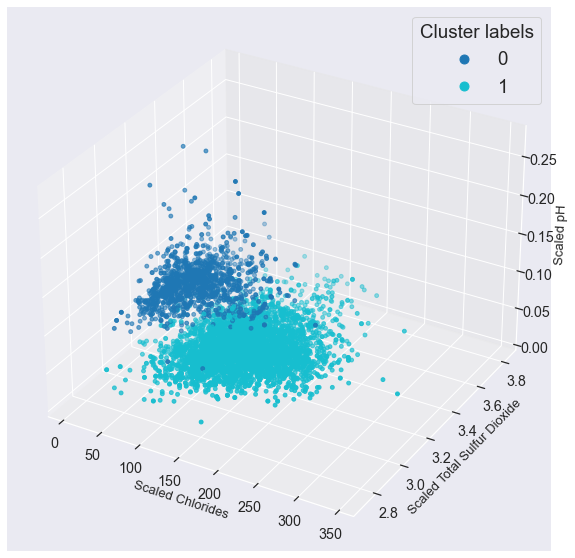

In [40]:
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")

plot = ax.scatter3D(df['total sulfur dioxide'], df['pH'], df['chlorides'], c=df['labels'], cmap='tab10', s = 15)
ax.legend(*plot.legend_elements(), fontsize='large', title='Cluster labels', title_fontsize='large', markerscale=1.5)

ax.set_xlabel('Scaled Chlorides', fontsize=13)
ax.set_ylabel('Scaled Total Sulfur Dioxide', fontsize=13)
ax.set_zlabel('Scaled pH', fontsize=13)
 
# show plot
plt.show()

#### Il metodo tied di calcolo della covarianza 'tied' (una unica covarianza per tutte le componenti) sembra essere il più efficace

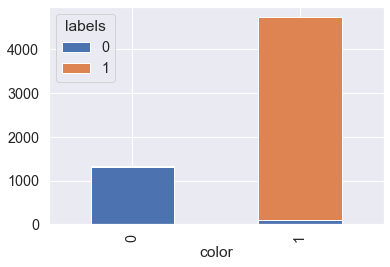

In [46]:
cross = pd.crosstab(df['color'], df['labels'])
cross.plot(kind='bar', stacked=True)
plt.show()

#### I cluster corrispondono in maniera molto pura al colore dei vini (0 vino rosso, 1 vino bianco)